In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf, adfuller

In [247]:
df = pd.read_csv('dataset\corporacion-favorit/store44.csv')

df

,id,date,store_nbr,family,quantity,onpromotion
0,3036,2013-01-02,44,AUTOMOTIVE,16.000,0
1,3068,2013-01-02,44,SEAFOOD,150.367,0
2,3065,2013-01-02,44,PREPARED FOODS,616.862,0
3,3064,2013-01-02,44,POULTRY,1034.765,0
4,3061,2013-01-02,44,PERSONAL CARE,716.000,0
...,...,...,...,...,...,...
45593,3000362,2017-08-15,44,BEAUTY,9.000,1
45594,3000360,2017-08-15,44,AUTOMOTIVE,15.000,0
45595,3000391,2017-08-15,44,SCHOOL AND OFFICE SUPPLIES,345.000,12
45596,3000375,2017-08-15,44,HOME AND KITCHEN I,136.000,1


# Analise Preditiva / Exploratória

In [248]:
df['quantity'].describe()

#mean = média aritmética
#std = desvio padrão

count    45598.000000
mean      1361.628871
std       2907.794710
min          1.000000
25%         24.000000
50%        281.752000
75%        997.610750
max      46271.000000
Name: quantity, dtype: float64

In [249]:
print('maior venda:')
print(df.loc[df['quantity'].idxmax()])

print('')
print('menor venda:')
print(df.loc[df['quantity'].idxmin()])

maior venda:
id                 562596
date           2013-11-12
store_nbr              44
family          GROCERY I
quantity          46271.0
onpromotion             0
Name: 6668, dtype: object

menor venda:
id                   4832
date           2013-01-03
store_nbr              44
family           HARDWARE
quantity              1.0
onpromotion             0
Name: 20, dtype: object


# Serie

In [250]:
produto_mv = ['GROCERY I']
produtos_mv = ['BEVERAGES', 'PRODUCE', 'CLEANING']

## Transformando em Serie

In [251]:
def transf_serie(df, produto):

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    df = df.sort_index(inplace=False)

    serie = df[df['family'] == produto]['quantity']

    return serie

In [252]:
series_df = {}

series_df['GROCERY I'] = transf_serie(df, produto_mv[0])

series_df

{'GROCERY I': date
 2013-01-02    10686.0
 2013-01-03     7342.0
 2013-01-04     7250.0
 2013-01-05    10699.0
 2013-01-06    12373.0
                ...   
 2017-08-11     9979.0
 2017-08-12     9391.0
 2017-08-13     9811.0
 2017-08-14     8318.0
 2017-08-15     8123.0
 Name: quantity, Length: 1679, dtype: float64}

In [253]:
for prod in produtos_mv:

    series_df[prod] = transf_serie(df, prod)

series_df

{'GROCERY I': date
 2013-01-02    10686.0
 2013-01-03     7342.0
 2013-01-04     7250.0
 2013-01-05    10699.0
 2013-01-06    12373.0
                ...   
 2017-08-11     9979.0
 2017-08-12     9391.0
 2017-08-13     9811.0
 2017-08-14     8318.0
 2017-08-15     8123.0
 Name: quantity, Length: 1679, dtype: float64,
 'BEVERAGES': date
 2013-01-02     5466.0
 2013-01-03     3718.0
 2013-01-04     4112.0
 2013-01-05     6458.0
 2013-01-06     7939.0
                ...   
 2017-08-11     9517.0
 2017-08-12     9624.0
 2017-08-13    10491.0
 2017-08-14     7322.0
 2017-08-15     7351.0
 Name: quantity, Length: 1679, dtype: float64,
 'PRODUCE': date
 2013-03-16       57.000
 2013-03-17       21.000
 2013-03-18        1.000
 2013-03-20       15.000
 2013-03-21       17.000
                 ...    
 2017-08-11     9311.460
 2017-08-12     9153.445
 2017-08-13    11201.803
 2017-08-14     8735.741
 2017-08-15     7239.617
 Name: quantity, Length: 1603, dtype: float64,
 'CLEANING': date
 2013

## Analise Exploratoria das Series

In [254]:
def analise_serie(series_df, prod):

    print('')
    
    print(f'Estatisticas de {prod}')

    print(series_df[prod].describe())

    print('---'*30)

In [255]:
analise_serie(series_df, produto_mv[0])


Estatisticas de GROCERY I
count     1679.000000
mean      9759.413364
std       3541.684894
min       2990.000000
25%       7292.000000
50%       8808.000000
75%      11665.000000
max      46271.000000
Name: quantity, dtype: float64
------------------------------------------------------------------------------------------


In [256]:
for prod in produtos_mv:
    
    analise_serie(series_df, prod)


Estatisticas de BEVERAGES
count     1679.000000
mean      7991.577725
std       3866.395840
min       1804.000000
25%       4662.000000
50%       7589.000000
75%       9611.500000
max      25413.000000
Name: quantity, dtype: float64
------------------------------------------------------------------------------------------

Estatisticas de PRODUCE
count     1603.000000
mean      6653.810654
std       5520.192801
min          1.000000
25%         36.000000
50%       7930.961000
75%      11173.282000
max      17850.615000
Name: quantity, dtype: float64
------------------------------------------------------------------------------------------

Estatisticas de CLEANING
count    1679.000000
mean     2565.967838
std       664.160437
min       814.000000
25%      2065.500000
50%      2409.000000
75%      2988.000000
max      5869.000000
Name: quantity, dtype: float64
------------------------------------------------------------------------------------------


### Estacionaridade da Serie

In [297]:
def adf_serie(series_df, prod):

    print('')

    result = adfuller(series_df[prod])
    p_value = result[1]


    if p_value > 0.05:
        print(f"A série {prod} não é estacionária. Diferenciação necessária.")
    else:
        print(f"A série {prod} é estacionária. Nenhuma diferenciação necessária.")

    plt.figure(figsize=(20, 5))
    plt.plot(series_df[prod], color='deepskyblue')
    plt.axhline(series_df[prod].mean(), color='red', linestyle='--', label='media movel')
    plt.title('Teste ADF para a serie de ' + prod)
    plt.xlabel('Tempo')
    plt.ylabel('Serie')
    plt.legend()
    plt.show()

    print('---'*50)
    print('')


A série GROCERY I é estacionária. Nenhuma diferenciação necessária.


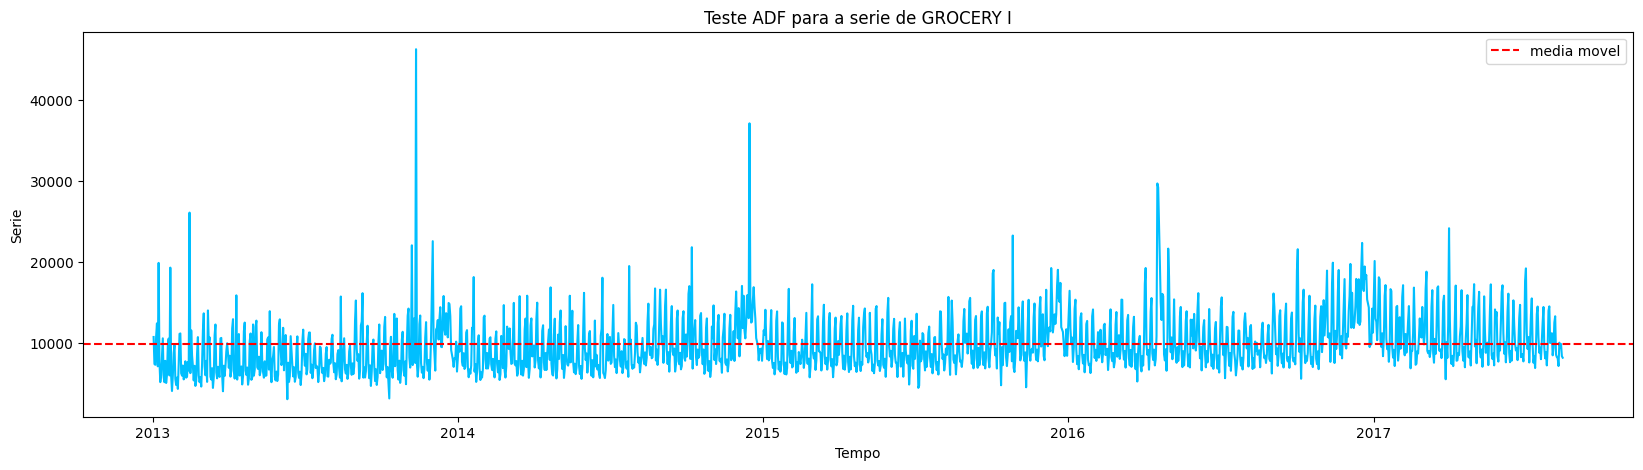

------------------------------------------------------------------------------------------------------------------------------------------------------



In [298]:
adf_serie(series_df, produto_mv[0])


A série BEVERAGES é estacionária. Nenhuma diferenciação necessária.


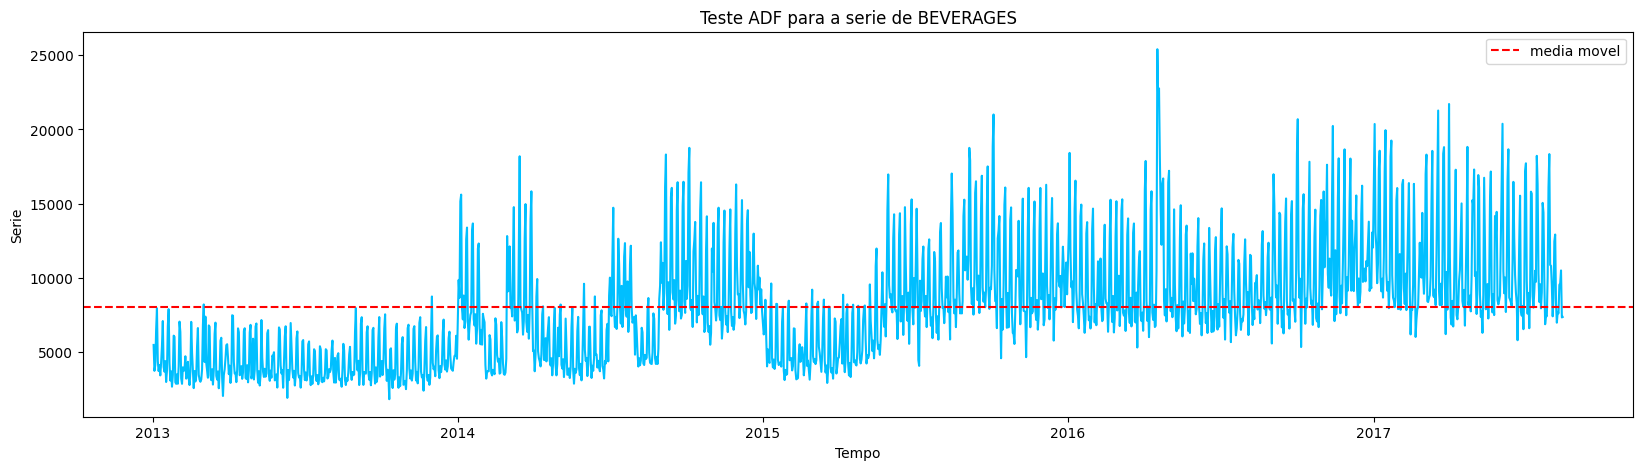

------------------------------------------------------------------------------------------------------------------------------------------------------


A série PRODUCE é estacionária. Nenhuma diferenciação necessária.


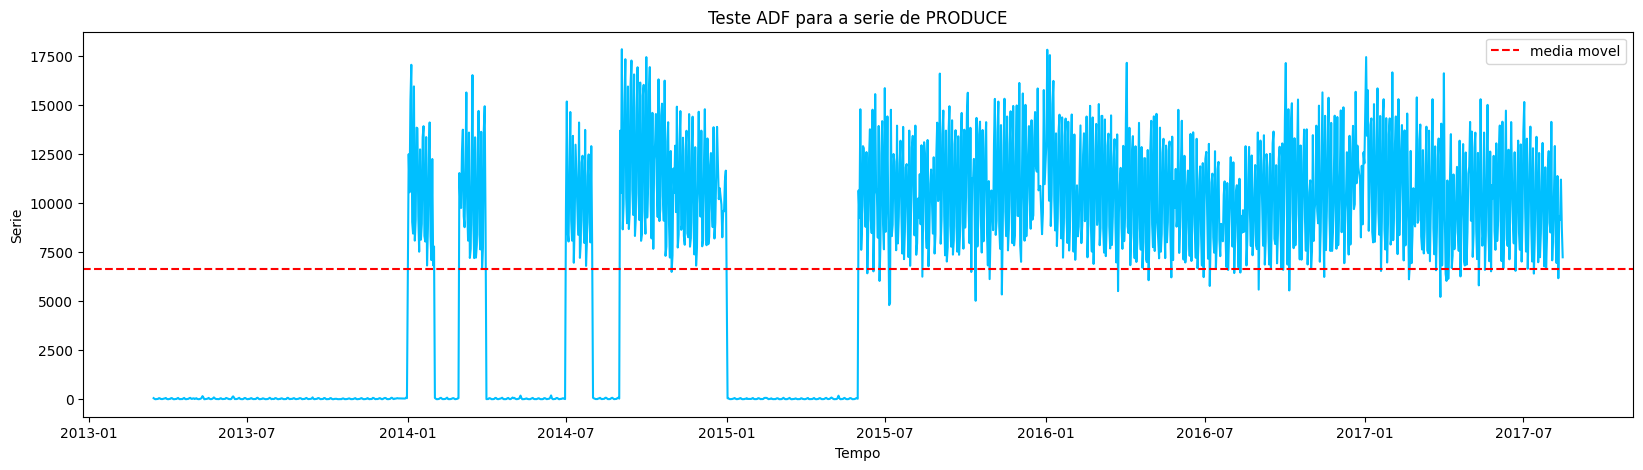

------------------------------------------------------------------------------------------------------------------------------------------------------


A série CLEANING é estacionária. Nenhuma diferenciação necessária.


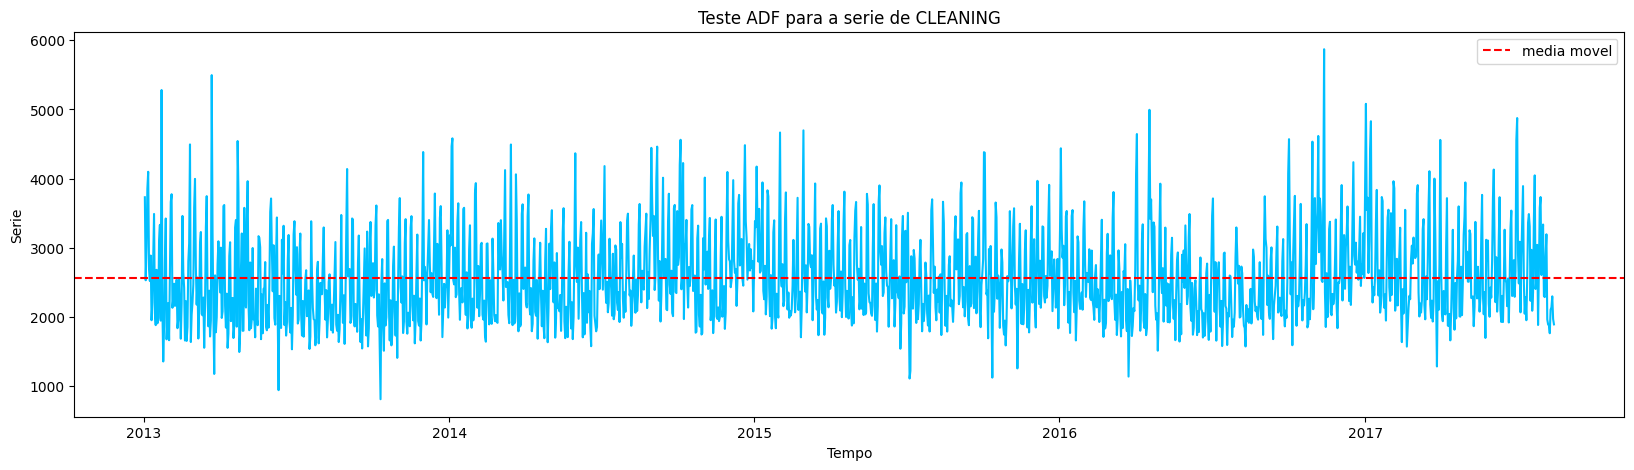

------------------------------------------------------------------------------------------------------------------------------------------------------



In [299]:
for prod in produtos_mv:
    adf_serie(series_df, prod)

### Decomposição Sazonal

In [308]:
def decomposition(series_df, prod, period=12):

    print('')
    print(f'Decomposição de {prod}')

    decomposition = seasonal_decompose(series_df[prod], model='additive', period=period)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    resid = decomposition.resid

    fig, ax=plt.subplots(4, 1, figsize=(20, 11))

    ax[0].plot(series_df[prod], color='deepskyblue')
    ax[0].set_title('Serie')

    ax[1].plot(decomposition.trend, color='red')
    ax[1].set_title('Tendência')

    ax[2].plot(decomposition.seasonal, color='limegreen')
    ax[2].set_title('Sazonalidade')

    ax[3].plot(decomposition.resid, color='orange')
    ax[3].set_title('Resíduo')

    plt.tight_layout()
    plt.show()

    print('---'*50)

    return trend, seasonal, resid


Decomposição de GROCERY I


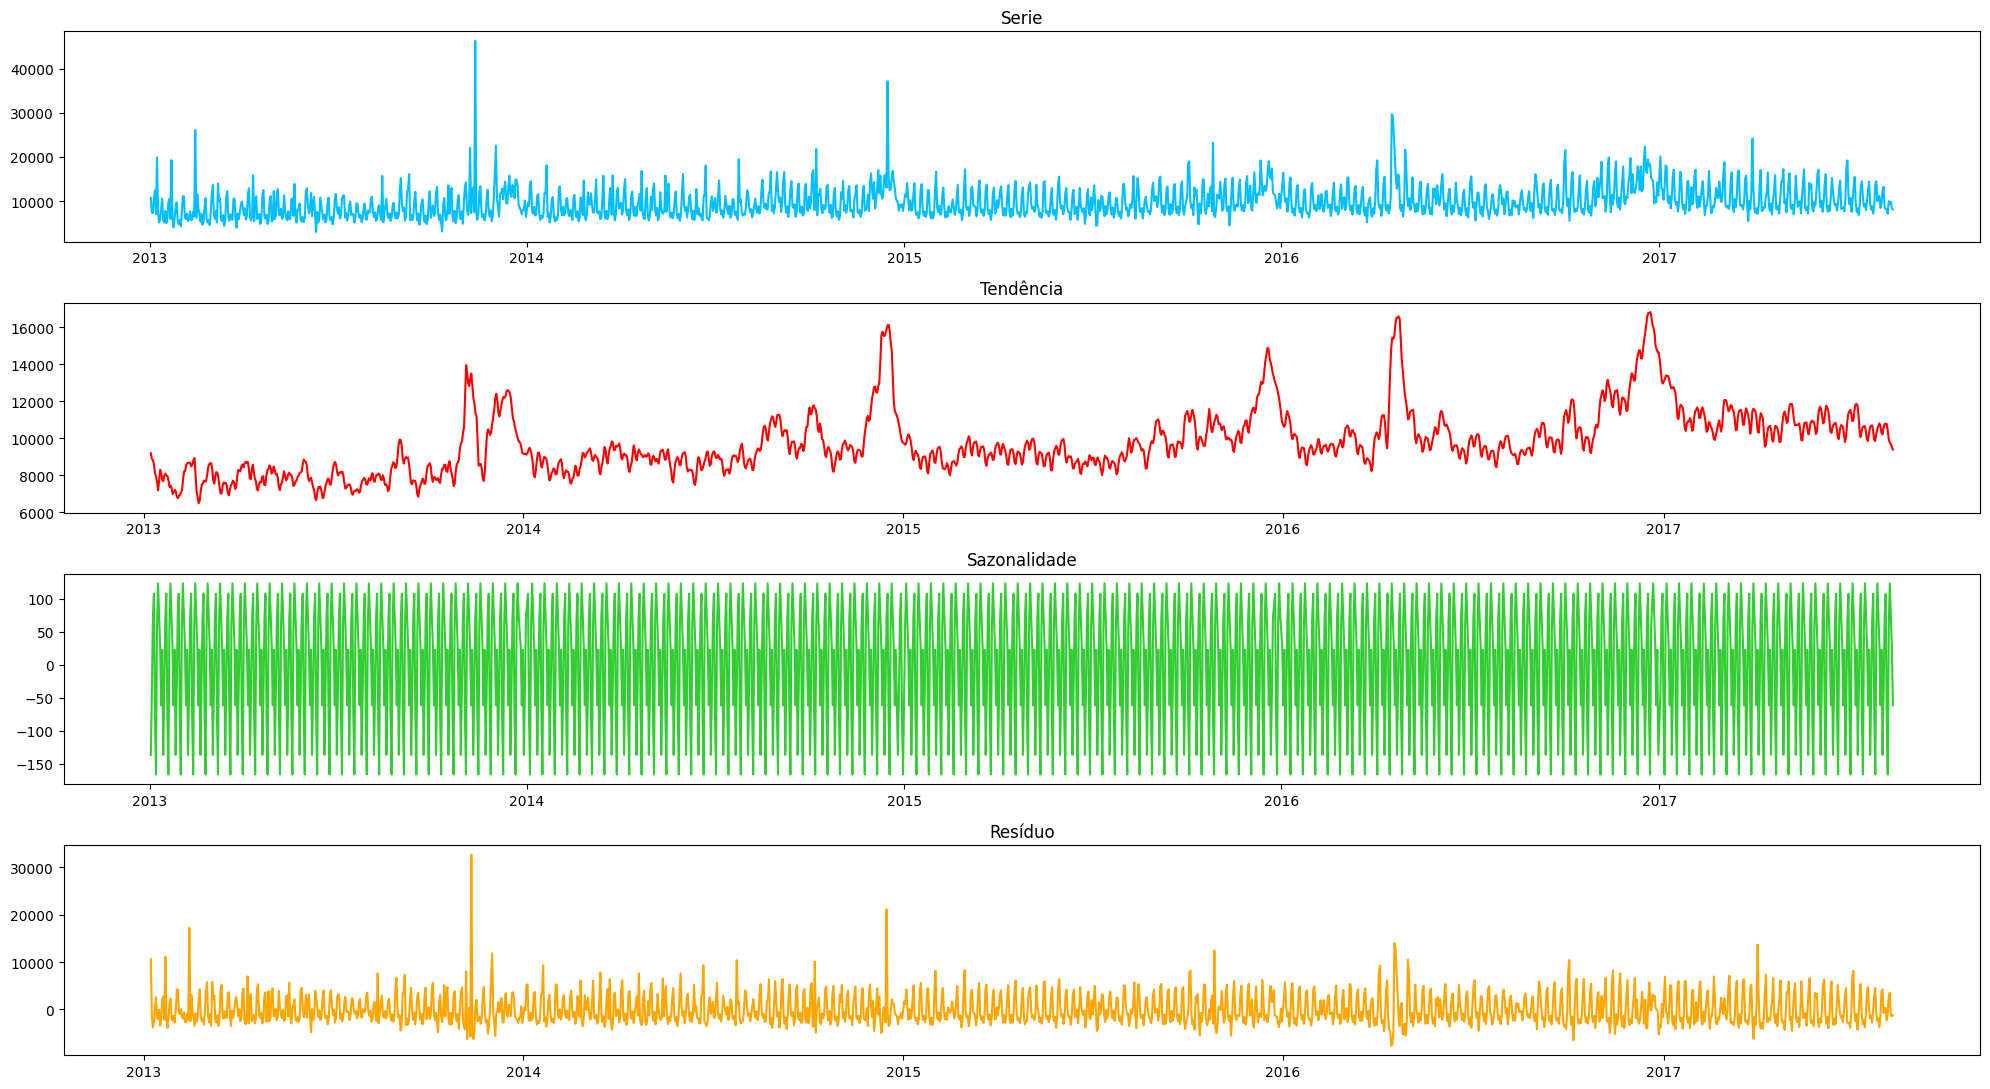

------------------------------------------------------------------------------------------------------------------------------------------------------


In [309]:
caracteristicas = {}

trend_mv, seasonal_mv, resid_mv = decomposition(series_df, produto_mv[0], 12)

caracteristicas[produto_mv[0]] = [trend_mv, seasonal_mv, resid_mv]



Decomposição de BEVERAGES


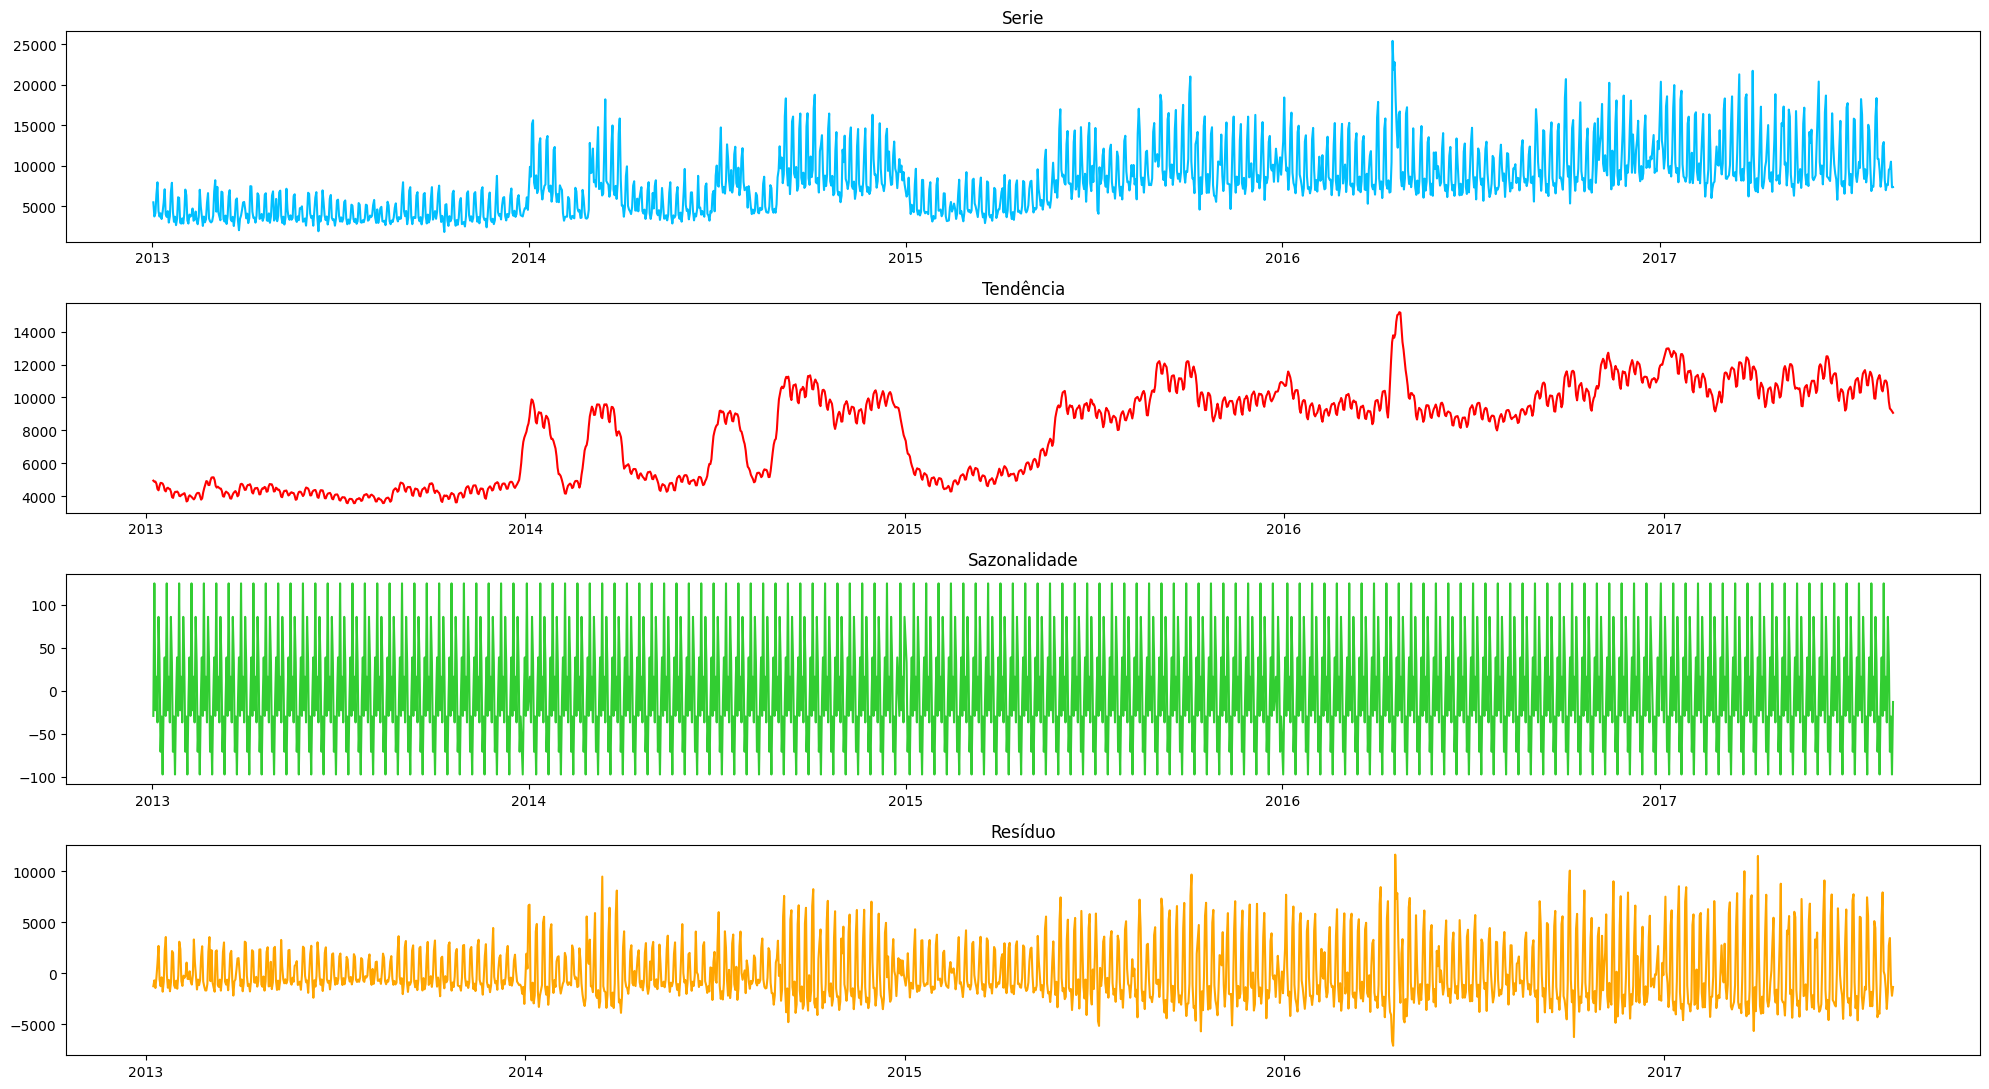

------------------------------------------------------------------------------------------------------------------------------------------------------

Decomposição de PRODUCE


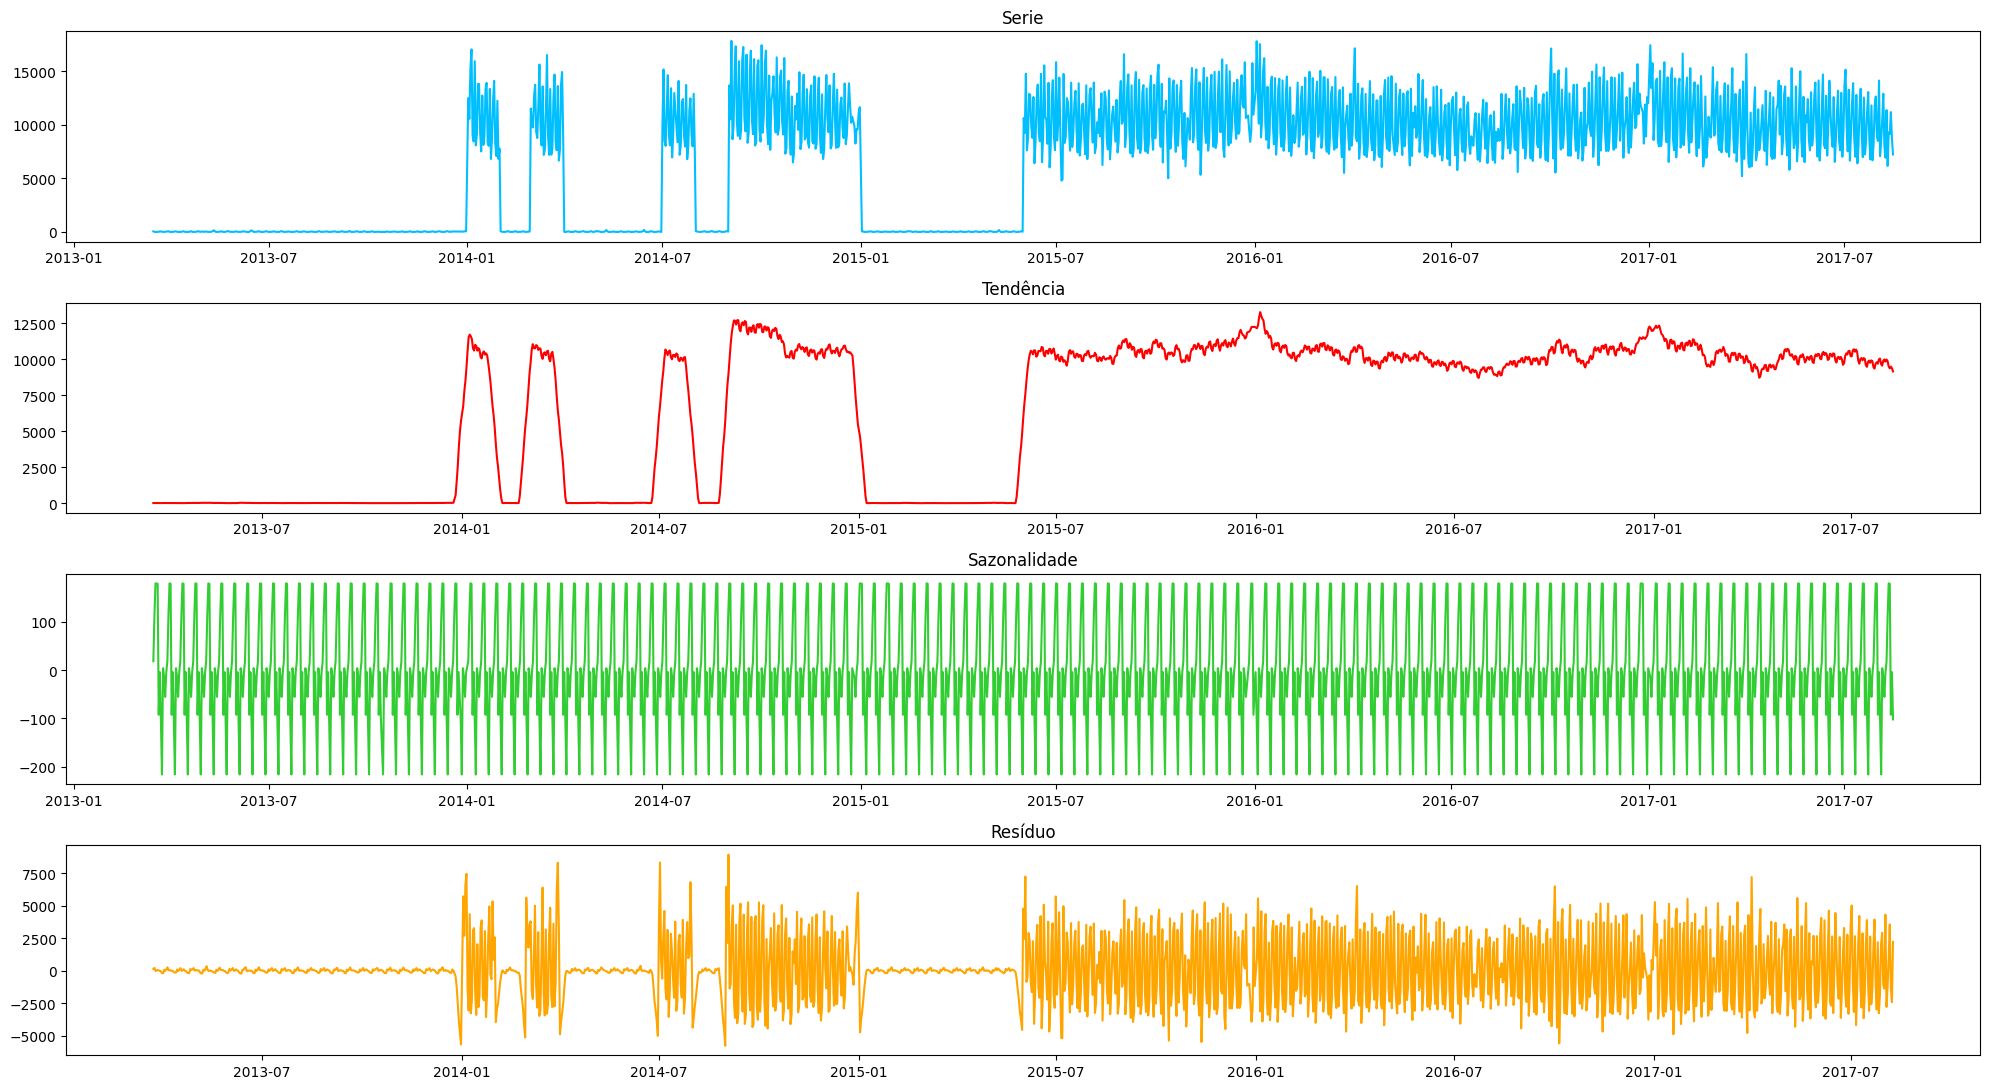

------------------------------------------------------------------------------------------------------------------------------------------------------

Decomposição de CLEANING


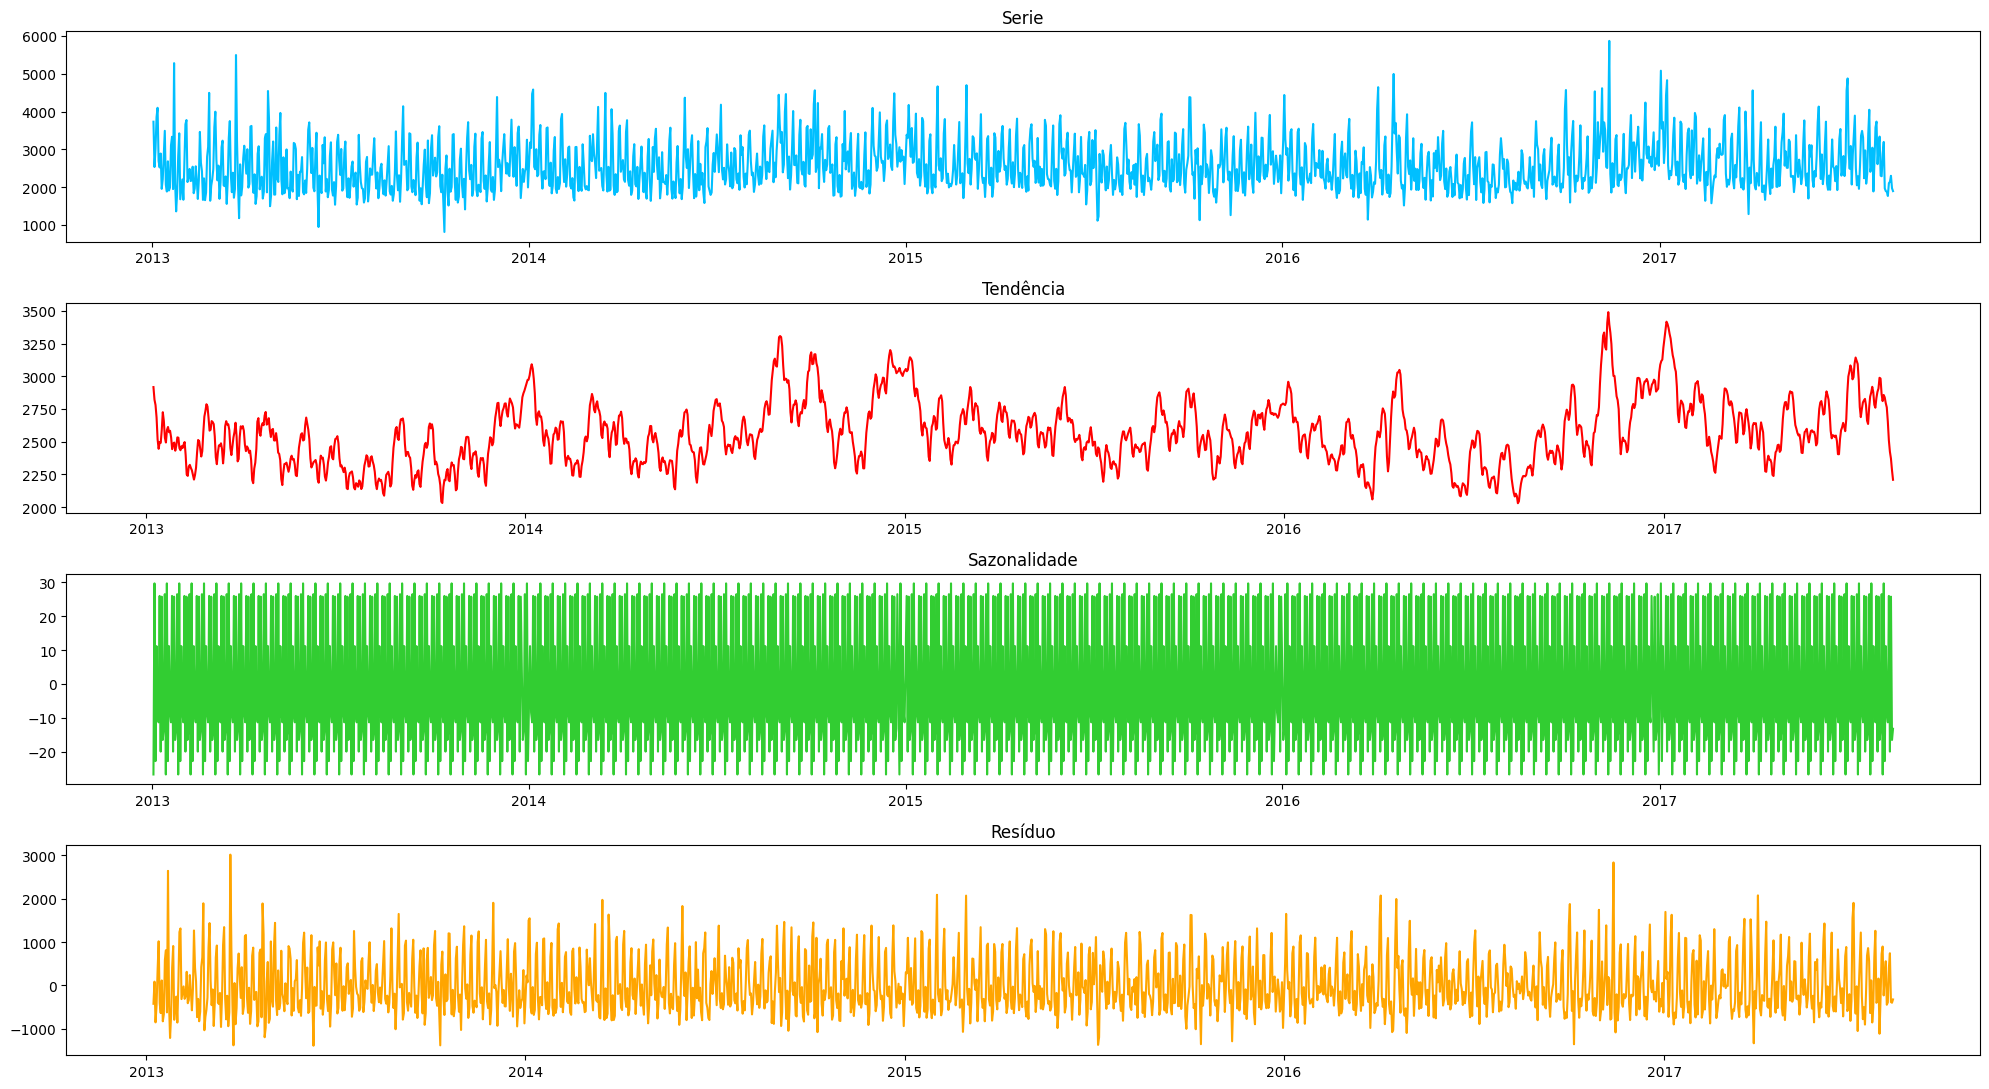

------------------------------------------------------------------------------------------------------------------------------------------------------


In [310]:
for prod in produtos_mv:
    
    trend, seasonal, resid = decomposition(series_df, prod, 12)

    caracteristicas[prod] = [trend, seasonal, resid]


### Autocorrelação dos resíduos das Series (ACF e PACF)

In [311]:
def acf_resid(caracteristicas, prod):

    print('')
    print(f'Gráfico da Autocorrelação dos resíduos de {prod}')

    autocorr_resid_serie = acf(caracteristicas[prod][2].dropna())

    plt.figure(figsize=(20, 5))
    plot_acf(autocorr_resid_serie, alpha=0.05)
    plt.ylabel('Autocorrelação')
    plt.title('Autocorrelação dos Resíduos (ACF)')
    plt.show()

    print('')
    print('---'*40)
    
    return autocorr_resid_serie


In [316]:
def pacf_resid(autocorr_resid_serie, prod):

    print('')
    print(f'Gráfico da Autocorrelação dos resíduos de {prod}')
    
    print('Lags = 2 meses')
    
    pacf_resid_serie = pacf(autocorr_resid_serie)

    plt.figure(figsize=(20, 5))
    plot_pacf(pacf_resid_serie, lags=5)
    plt.ylabel('Autocorrelação')
    plt.title('Autocorrelação dos Resíduos (PACF)')
    plt.show()

    print('')
    print('---'*40)



Gráfico da Autocorrelação dos resíduos de GROCERY I


<Figure size 2000x500 with 0 Axes>

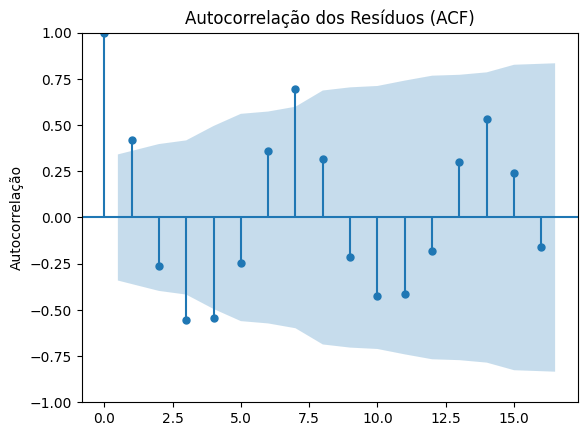


------------------------------------------------------------------------------------------------------------------------

Gráfico da Autocorrelação dos resíduos de GROCERY I
Lags = 2 meses


<Figure size 2000x500 with 0 Axes>

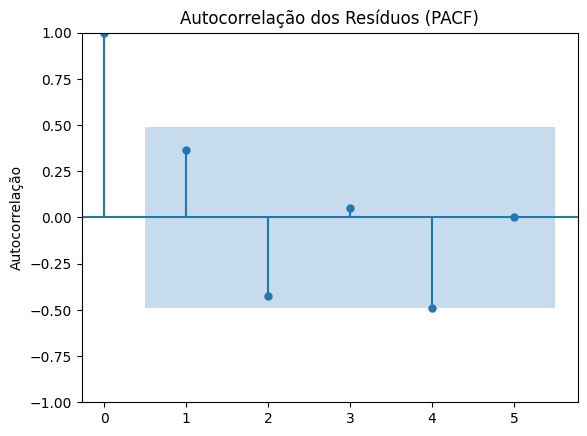


------------------------------------------------------------------------------------------------------------------------


In [317]:
aut_corr = acf_resid(caracteristicas, produto_mv[0])

pacf_resid(aut_corr, produto_mv[0])


Gráfico da Autocorrelação dos resíduos de BEVERAGES


<Figure size 1000x500 with 0 Axes>

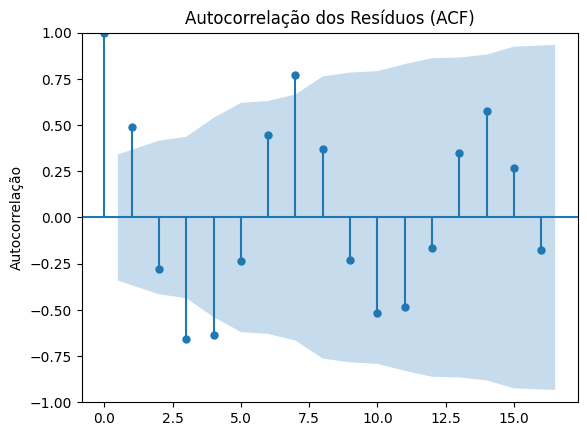


------------------------------------------------------------------------------------------------------------------------

Gráfico da Autocorrelação dos resíduos de PRODUCE


<Figure size 1000x500 with 0 Axes>

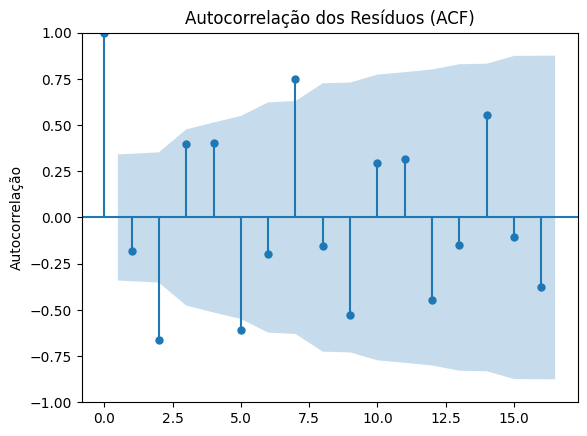


------------------------------------------------------------------------------------------------------------------------

Gráfico da Autocorrelação dos resíduos de CLEANING


<Figure size 1000x500 with 0 Axes>

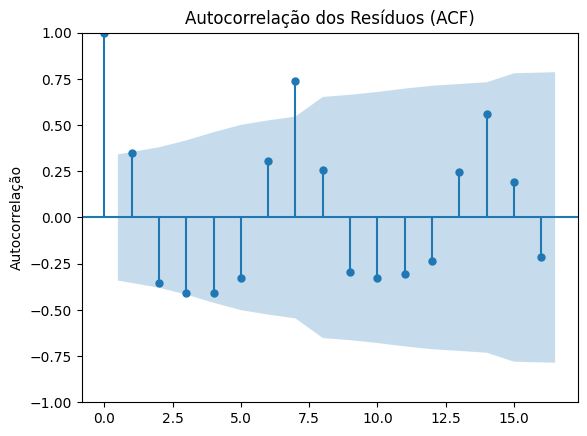


------------------------------------------------------------------------------------------------------------------------


In [268]:
for prod in produtos_mv:
    
    acf_resid(caracteristicas, prod)